In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
tf.random.set_seed(1)


In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [5]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [6]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0



In [7]:
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

y_train_encoded = one_hot_encode(y_train, 10)
y_test_encoded = one_hot_encode(y_test, 10)


In [8]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, l1_lambda=0.0, l2_lambda=0.0):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        self.l1_lambda = l1_lambda
        self.l2_lambda = l2_lambda
        self.loss_history = []

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def backward(self, X, y, output):
        m = X.shape[0]
        output_error = output - y
        hidden_error = np.dot(output_error, self.W2.T) * (1 - np.tanh(self.z1) ** 2)

        dW2 = np.dot(self.a1.T, output_error) / m
        db2 = np.sum(output_error, axis=0, keepdims=True) / m
        dW1 = np.dot(X.T, hidden_error) / m
        db1 = np.sum(hidden_error, axis=0, keepdims=True) / m

        # L1 regularization
        dW1 += self.l1_lambda * np.sign(self.W1)
        dW2 += self.l1_lambda * np.sign(self.W2)

        # L2 regularization
        dW1 += self.l2_lambda * self.W1
        dW2 += self.l2_lambda * self.W2

        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X, y, epochs, regularization_type="L2"):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

            # Calculate loss with regularization penalties
            if regularization_type == "L1":
                penalty = self.l1_lambda * (np.sum(np.abs(self.W1)) + np.sum(np.abs(self.W2)))
            else:  # L2 Regularization by default
                penalty = self.l2_lambda * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))

            loss = -np.mean(np.sum(y * np.log(output + 1e-10), axis=1)) + penalty
            self.loss_history.append(loss)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

   
    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)





In [10]:
input_size = 0 
hidden_size = 0  
output_size = 0   
learning_rate = 0
epochs = 0

In [11]:
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
nn.train(x_train, y_train_encoded, epochs)

In [12]:
nn_l1 = NeuralNetwork(input_size=784, hidden_size=128, output_size=10, learning_rate=0.1, l1_lambda=0.00001)
nn_l2 = NeuralNetwork(input_size=784, hidden_size=128, output_size=10, learning_rate=0.1, l2_lambda=0.00001)
epochs=1000

In [14]:
nn_l1.train(x_train, y_train_encoded, epochs=epochs, regularization_type="L1")
nn_l2.train(x_train, y_train_encoded, epochs=epochs, regularization_type="L2")


Epoch 0, Loss: 0.5594
Epoch 100, Loss: 0.5237
Epoch 200, Loss: 0.4997
Epoch 300, Loss: 0.4822
Epoch 400, Loss: 0.4686
Epoch 500, Loss: 0.4575
Epoch 600, Loss: 0.4482
Epoch 700, Loss: 0.4402
Epoch 800, Loss: 0.4362
Epoch 900, Loss: 0.4305
Epoch 0, Loss: 2.3035
Epoch 100, Loss: 0.9100
Epoch 200, Loss: 0.6874
Epoch 300, Loss: 0.5941
Epoch 400, Loss: 0.5399
Epoch 500, Loss: 0.5055
Epoch 600, Loss: 0.4820
Epoch 700, Loss: 0.4646
Epoch 800, Loss: 0.4509
Epoch 900, Loss: 0.4396


In [15]:
predictions = nn_l1.predict(x_test)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

predictions = nn_l2.predict(x_test)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8387
Test Accuracy: 0.8346


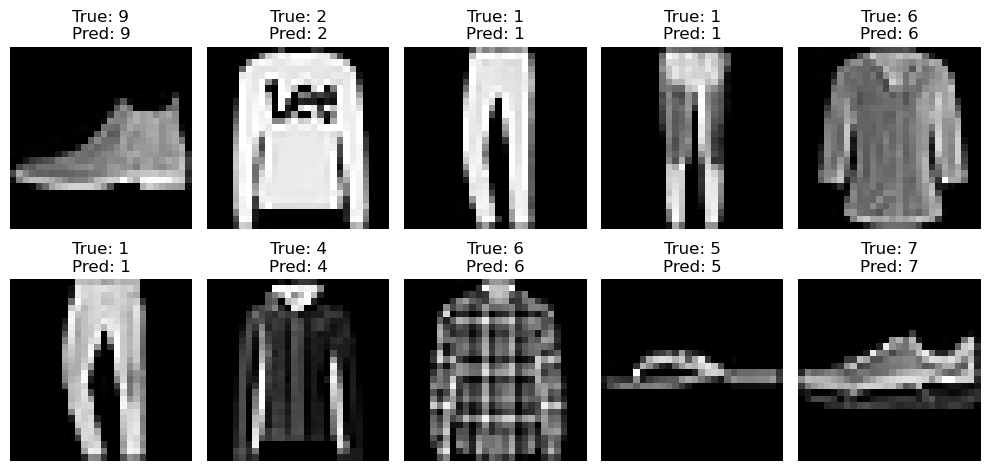

In [16]:
def plot_predictions(X, y_true, y_pred, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {y_true[i]}\nPred: {y_pred[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_predictions(x_test, y_test, predictions)


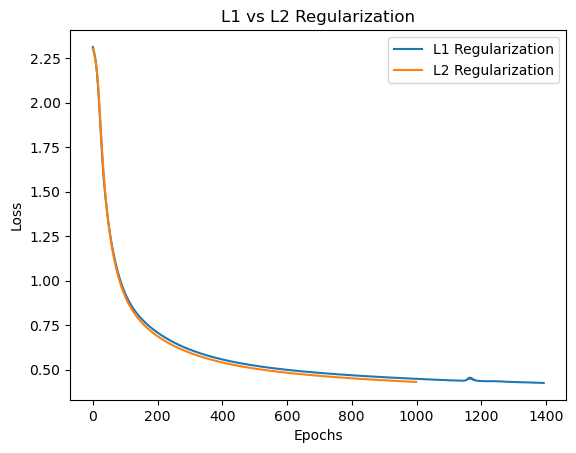

In [17]:
plt.plot(nn_l1.loss_history, label='L1 Regularization')
plt.plot(nn_l2.loss_history, label='L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('L1 vs L2 Regularization')
plt.legend()
plt.show()